In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import os, re
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from IPython.display import IFrame
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
 
%matplotlib inline
 
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import the dataset from the folder created in the same working directory as the notebook
path_to_data = '.\Westmidlands_Police'
cd = os.path.dirname(os.path.abspath(path_to_data))
 
i = 0
columns = range(1,100)
dfLists = []
 
for roots, dirr, filess in os.walk(cd):
    for fName in filess:
        if re.match("^.*.csv$", fName):
            frame = pd.read_csv(os.path.join(roots, fName))
            frame['key'] = "file{}".format(i)
            dfLists.append(frame)    
            i += 1
 
dataset = pd.concat(dfLists)

In [4]:
#visulize the data
dataset.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key
0,e239f9e7490e464c35f3366916bd63a818e5adb21769cb...,2021-04,West Midlands Police,West Midlands Police,-1.840641,52.598270,On or near Badgers Bank Road,E01009418,Birmingham 001B,Criminal damage and arson,Investigation complete; no suspect identified,NaN,file0
1,b78b07c6fc2f86c051bafb7c6ee1b5df6c2c75bdea9c04...,2021-04,West Midlands Police,West Midlands Police,-1.839063,52.597809,On or near Byron Court,E01009418,Birmingham 001B,Criminal damage and arson,Investigation complete; no suspect identified,NaN,file0
2,89224626d2cfd74cb1009c7b64b8606453a31f2063c18a...,2021-04,West Midlands Police,West Midlands Police,-1.845780,52.593827,On or near Hook Drive,E01009418,Birmingham 001B,Public order,Investigation complete; no suspect identified,NaN,file0
3,0917c7900ab01bf73b4c7e835e09b9d410ec0417238952...,2021-04,West Midlands Police,West Midlands Police,-1.845439,52.594213,On or near Harcourt Drive,E01009418,Birmingham 001B,Public order,Status update unavailable,NaN,file0
4,d851d5f177f0c2915217d30edabf953e81f738248f6bca...,2021-04,West Midlands Police,West Midlands Police,-1.845439,52.594213,On or near Harcourt Drive,E01009418,Birmingham 001B,Public order,Unable to prosecute suspect,NaN,file0


In [5]:
#check the number of rows and columns in the data set
dataset.shape

(1257627, 13)

In [6]:
#rename the dataset to a csv file
name_ = 'Westmidland_crime.csv'
dataset.to_csv(name_, index=False)

In [7]:
#using pandas read the csv data set
data = pd.read_csv(name_)

Text(0.5, 0, 'Frequency')

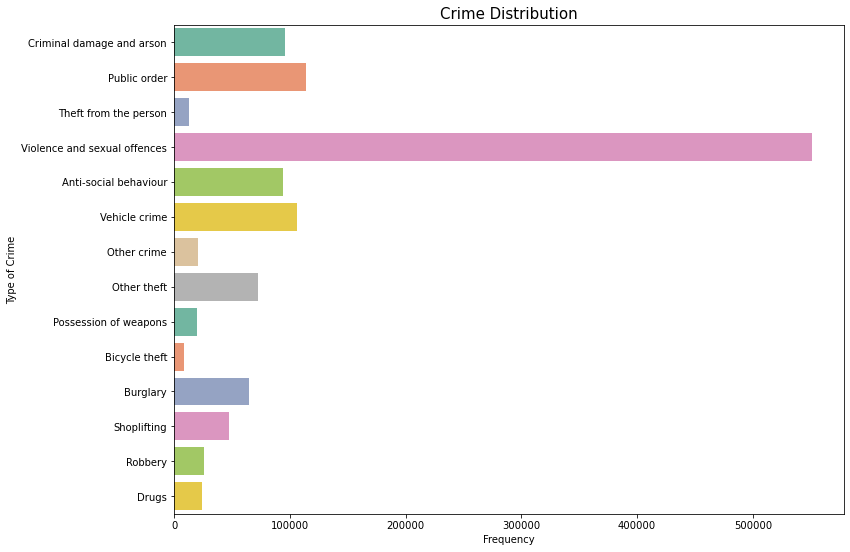

In [8]:
plt.figure(figsize=(12,9))
sns.countplot(data=data, y="Crime type", palette='Set2')
plt.title("Crime Distribution", fontsize=15)
plt.ylabel('Type of Crime')
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

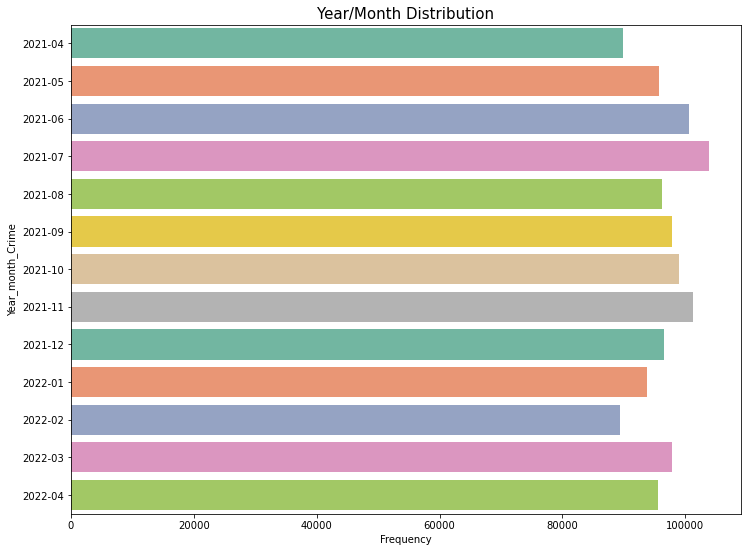

In [9]:
plt.figure(figsize=(12,9))
sns.countplot(data=data, y="Month", palette='Set2')
plt.title("Year/Month Distribution", fontsize=15)
plt.ylabel('Year_month_Crime')
plt.xlabel('Frequency')

In [10]:
#split to get the towns in wesmidlands
#Always create a checkpoint for your data
new_data= data.copy()
new_data['town'] = new_data['LSOA name'].str.split(' ').str[0]

In [11]:
new_data

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key,town
0,e239f9e7490e464c35f3366916bd63a818e5adb21769cb...,2021-04,West Midlands Police,West Midlands Police,-1.840641,52.598270,On or near Badgers Bank Road,E01009418,Birmingham 001B,Criminal damage and arson,Investigation complete; no suspect identified,NaN,file0,Birmingham
1,b78b07c6fc2f86c051bafb7c6ee1b5df6c2c75bdea9c04...,2021-04,West Midlands Police,West Midlands Police,-1.839063,52.597809,On or near Byron Court,E01009418,Birmingham 001B,Criminal damage and arson,Investigation complete; no suspect identified,NaN,file0,Birmingham
2,89224626d2cfd74cb1009c7b64b8606453a31f2063c18a...,2021-04,West Midlands Police,West Midlands Police,-1.845780,52.593827,On or near Hook Drive,E01009418,Birmingham 001B,Public order,Investigation complete; no suspect identified,NaN,file0,Birmingham
3,0917c7900ab01bf73b4c7e835e09b9d410ec0417238952...,2021-04,West Midlands Police,West Midlands Police,-1.845439,52.594213,On or near Harcourt Drive,E01009418,Birmingham 001B,Public order,Status update unavailable,NaN,file0,Birmingham
4,d851d5f177f0c2915217d30edabf953e81f738248f6bca...,2021-04,West Midlands Police,West Midlands Police,-1.845439,52.594213,On or near Harcourt Drive,E01009418,Birmingham 001B,Public order,Unable to prosecute suspect,NaN,file0,Birmingham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257622,f876d45c5f607f5d069408a67d03358a62a98d2c92f037...,2022-04,West Midlands Police,West Midlands Police,-2.119856,52.583267,On or near Parking Area,E01010530,Wolverhampton 035H,Violence and sexual offences,Unable to prosecute suspect,NaN,file13,Wolverhampton
1257623,41e4417770b87447c4ba604e61e9d5dd04ef858aa90c2b...,2022-04,West Midlands Police,West Midlands Police,-2.117131,52.579575,On or near Steelhouse Lane,E01010530,Wolverhampton 035H,Violence and sexual offences,Unable to prosecute suspect,NaN,file13,Wolverhampton
1257624,15f2e7259c6e606216192e66bbfc1da7b49dbb696111e6...,2022-04,West Midlands Police,West Midlands Police,-2.120244,52.579230,On or near Granville Close,E01010530,Wolverhampton 035H,Violence and sexual offences,Investigation complete; no suspect identified,NaN,file13,Wolverhampton
1257625,b09017d1d4b08d097e7db7eee711fb15419f111096f401...,2022-04,West Midlands Police,West Midlands Police,-2.117818,52.582811,On or near Duke Street,E01010530,Wolverhampton 035H,Violence and sexual offences,Unable to prosecute suspect,NaN,file13,Wolverhampton


In [12]:
#Selecting data for wolverhampton
towns = ['Wolverhampton']
filtered_data = new_data[new_data.town.str.contains('|'.join(towns), na=False)]
filtered_data.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key,town
27060,NaN,2021-04,West Midlands Police,West Midlands Police,-2.129703,52.619162,On or near Supermarket,E01010434,Wolverhampton 001A,Anti-social behaviour,NaN,NaN,file0,Wolverhampton
27061,NaN,2021-04,West Midlands Police,West Midlands Police,-2.120940,52.617814,On or near Sherborne Road,E01010434,Wolverhampton 001A,Anti-social behaviour,NaN,NaN,file0,Wolverhampton
27062,e971cac599fb01c14c2b42965a6d91173c00167c29c671...,2021-04,West Midlands Police,West Midlands Police,-2.129427,52.620663,On or near Three Tuns Parade,E01010434,Wolverhampton 001A,Burglary,Investigation complete; no suspect identified,NaN,file0,Wolverhampton
27063,819a01ed011d90b2d231e3ebe9d76a3e43f7d52990a118...,2021-04,West Midlands Police,West Midlands Police,-2.129483,52.619593,On or near Petrol Station,E01010434,Wolverhampton 001A,Burglary,Investigation complete; no suspect identified,NaN,file0,Wolverhampton
27064,951cd2a3ae1ed62b6973743408253ac5e98af645ce174b...,2021-04,West Midlands Police,West Midlands Police,-2.129427,52.620663,On or near Three Tuns Parade,E01010434,Wolverhampton 001A,Burglary,Investigation complete; no suspect identified,NaN,file0,Wolverhampton


In [13]:
filtered_data.shape

(122592, 14)

Text(0.5, 0, 'Frequency')

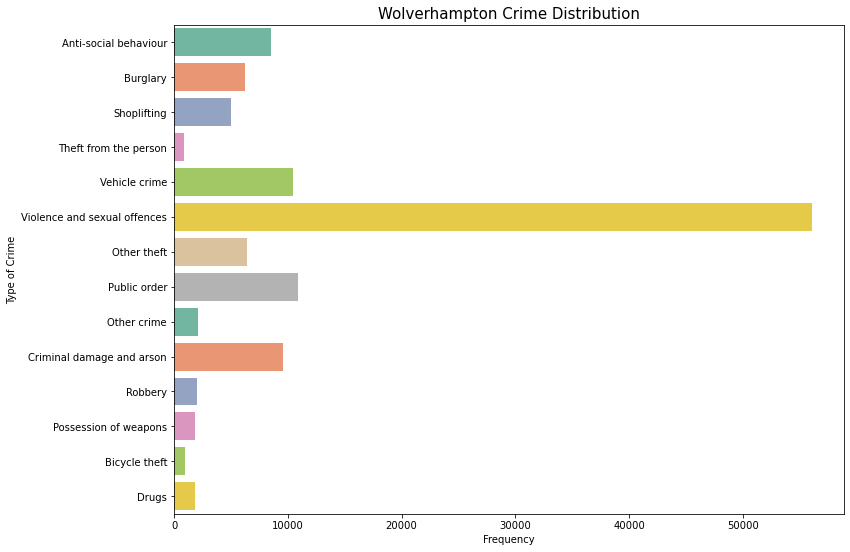

In [14]:
plt.figure(figsize=(12,9))
sns.countplot(data=filtered_data, y="Crime type", palette='Set2')
plt.title("Wolverhampton Crime Distribution", fontsize=15)
plt.ylabel('Type of Crime')
plt.xlabel('Frequency')

In [15]:
filtered_data['LSOA code'].value_counts().nlargest(10)

E01010521    10725
E01010564     4194
E01010414     2991
E01010410     2253
E01010450     2085
E01010473     1671
E01010464     1638
E01010453     1629
E01010530     1617
E01010472     1578
Name: LSOA code, dtype: int64

In [16]:
#Selecting relevant columns for clustering
filtered_important_data = filtered_data[['LSOA code','Crime type']]
filtered_important_data = pd.get_dummies(filtered_important_data, columns=['Crime type'])
clustering_data = filtered_important_data.groupby(['LSOA code']).agg({'Crime type_Anti-social behaviour': 'sum',
                                                    'Crime type_Bicycle theft':'sum',
                                                    'Crime type_Burglary':'sum',
                                                    'Crime type_Criminal damage and arson':'sum',
                                                    'Crime type_Drugs':'sum', 
                                                    'Crime type_Other crime':'sum', 
                                                    'Crime type_Other theft':'sum', 
                                                    'Crime type_Possession of weapons':'sum',
                                                    'Crime type_Public order':'sum', 
                                                    'Crime type_Robbery':'sum', 
                                                    'Crime type_Shoplifting':'sum', 
                                                    'Crime type_Theft from the person':'sum',
                                                    'Crime type_Vehicle crime':'sum', 
                                                    'Crime type_Violence and sexual offences': 'sum'}).reset_index()

In [17]:
#view the first 5 clusting_data
clustering_data[:5]

,LSOA code,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,E01010410,252.0,12,111.0,168.0,6,27,408.0,18,195.0,57.0,81.0,6,240.0,672.0
1,E01010411,15.0,3,15.0,54.0,6,12,15.0,3,39.0,3.0,0.0,3,36.0,372.0
2,E01010412,78.0,0,39.0,111.0,9,30,33.0,18,99.0,21.0,0.0,3,102.0,570.0
3,E01010413,54.0,3,36.0,66.0,6,15,24.0,12,42.0,15.0,183.0,0,78.0,381.0
4,E01010414,216.0,27,252.0,330.0,15,57,111.0,30,288.0,63.0,213.0,51,285.0,1053.0


In [18]:
clustering_data_original = clustering_data.copy()
clustering_data_original.head()

,LSOA code,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,E01010410,252.0,12,111.0,168.0,6,27,408.0,18,195.0,57.0,81.0,6,240.0,672.0
1,E01010411,15.0,3,15.0,54.0,6,12,15.0,3,39.0,3.0,0.0,3,36.0,372.0
2,E01010412,78.0,0,39.0,111.0,9,30,33.0,18,99.0,21.0,0.0,3,102.0,570.0
3,E01010413,54.0,3,36.0,66.0,6,15,24.0,12,42.0,15.0,183.0,0,78.0,381.0
4,E01010414,216.0,27,252.0,330.0,15,57,111.0,30,288.0,63.0,213.0,51,285.0,1053.0


In [19]:
#drop lsoa code as it is not relevant to us
clustering_data.drop(['LSOA code'], axis = 1, inplace = True, errors = 'ignore')
clustering_data.head()

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,252.0,12,111.0,168.0,6,27,408.0,18,195.0,57.0,81.0,6,240.0,672.0
1,15.0,3,15.0,54.0,6,12,15.0,3,39.0,3.0,0.0,3,36.0,372.0
2,78.0,0,39.0,111.0,9,30,33.0,18,99.0,21.0,0.0,3,102.0,570.0
3,54.0,3,36.0,66.0,6,15,24.0,12,42.0,15.0,183.0,0,78.0,381.0
4,216.0,27,252.0,330.0,15,57,111.0,30,288.0,63.0,213.0,51,285.0,1053.0


In [20]:
#Hierarchical clustering depends on eucledian distance so having features on different scale will be probamatic to the algorith
#Normalize the dataset

data_scaled = normalize(clustering_data)
data_scaled = pd.DataFrame(data_scaled, columns=clustering_data.columns)
data_scaled.head()


,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,0.276806,0.013181,0.121926,0.184537,0.006591,0.029658,0.448162,0.019772,0.214195,0.062611,0.088973,0.006591,0.263625,0.738149
1,0.039391,0.007878,0.039391,0.141807,0.015756,0.031513,0.039391,0.007878,0.102416,0.007878,0.000000,0.007878,0.094538,0.976893
2,0.128601,0.000000,0.064301,0.183009,0.014839,0.049462,0.054408,0.029677,0.163224,0.034623,0.000000,0.004946,0.168171,0.939777
3,0.121886,0.006771,0.081257,0.148972,0.013543,0.033857,0.054172,0.027086,0.094800,0.033857,0.413059,0.000000,0.176058,0.859975
4,0.172861,0.021608,0.201671,0.264093,0.012004,0.045616,0.088831,0.024008,0.230481,0.050418,0.170460,0.040814,0.228080,0.842696


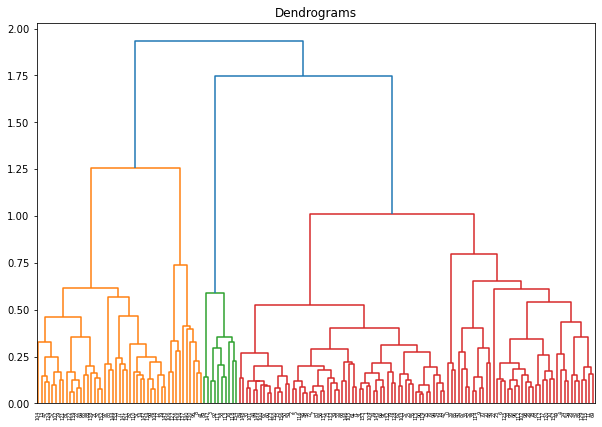

In [21]:
#determine the number of clusters using dendogram
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

We are interested in spotting the vertical line with maximum distance without any horizontal line passing through it. In the dendrogram it is the blue line and hence we can decide a threshold of 1.5 and cut thedendrogram.

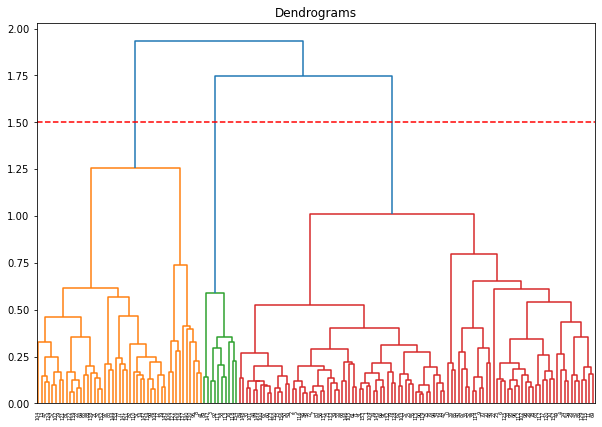

In [22]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=1.5, color='r', linestyle='--')

Since the vertical line cuts four points in the dendogram, there are three clusters in this dataset. You may have
different results based on your dataset

In [23]:
#performing clustering using n_clusters as 3
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster_ids = cluster.fit_predict(data_scaled)

from the code above
n_clusters is set to 3;
affinity, which is a distance matrix and is set to "euclidean" (distance between the data points); and
linkage is set to "ward", which minimizes the variant between the clusters.


In [24]:
#visulaizing the cluster dataset
clustering_data['cluster'] = cluster_ids
clustering_data.head()

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences,cluster
0,252.0,12,111.0,168.0,6,27,408.0,18,195.0,57.0,81.0,6,240.0,672.0,1
1,15.0,3,15.0,54.0,6,12,15.0,3,39.0,3.0,0.0,3,36.0,372.0,1
2,78.0,0,39.0,111.0,9,30,33.0,18,99.0,21.0,0.0,3,102.0,570.0,1
3,54.0,3,36.0,66.0,6,15,24.0,12,42.0,15.0,183.0,0,78.0,381.0,2
4,216.0,27,252.0,330.0,15,57,111.0,30,288.0,63.0,213.0,51,285.0,1053.0,1


it is necessary to understand the intuition behind the clusters. To do that  inspect the clusters. With the 
code below, then calculate the mean value of these clusters.

In [25]:
hierarchical_cluster = pd.DataFrame(round(clustering_data.groupby('cluster').mean(),1))
hierarchical_cluster

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
cluster,,,,,,,,,,,,,,
0,25.8,1.5,26.7,32.7,4.1,6.1,18.1,4.6,37.3,3.8,3.3,1.7,64.5,166.1
1,58.0,5.2,39.3,66.6,12.5,15.2,41.6,12.2,69.0,12.6,16.9,4.2,61.2,399.4
2,147.3,36.3,97.2,127.8,40.5,25.2,133.8,38.4,216.0,52.8,311.7,36.3,124.5,789.9


Observation shows
Cluster ID 2 is the LSOA codes with highest number of crimes (high risk areas).
Cluster ID 1 is the LSOA codes with moderate number of crimes.
Cluster ID 0 is the LSOA codes with lowest number of crimes (lower risk areas).

Drawing a plot to get the dangerous areas in Wolverhampton using the four steps below.

In [26]:
# 1 merge cluster id to lsao code

clustering_data_original['cluster'] = cluster_ids
clusters = clustering_data_original[['LSOA code', 'cluster']]

In [27]:
#visulaize the data frame
clusters.head()

,LSOA code,cluster
0,E01010410,1
1,E01010411,1
2,E01010412,1
3,E01010413,2
4,E01010414,1


In [28]:
clusters.shape

(158, 2)

In [29]:
#2 Assign each crime to a cluster based on the LSOA code.
clustered_full = pd.merge(filtered_data, clusters, on='LSOA code')
clustered_full.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key,town,cluster
0,NaN,2021-04,West Midlands Police,West Midlands Police,-2.129703,52.619162,On or near Supermarket,E01010434,Wolverhampton 001A,Anti-social behaviour,NaN,NaN,file0,Wolverhampton,1
1,NaN,2021-04,West Midlands Police,West Midlands Police,-2.120940,52.617814,On or near Sherborne Road,E01010434,Wolverhampton 001A,Anti-social behaviour,NaN,NaN,file0,Wolverhampton,1
2,e971cac599fb01c14c2b42965a6d91173c00167c29c671...,2021-04,West Midlands Police,West Midlands Police,-2.129427,52.620663,On or near Three Tuns Parade,E01010434,Wolverhampton 001A,Burglary,Investigation complete; no suspect identified,NaN,file0,Wolverhampton,1
3,819a01ed011d90b2d231e3ebe9d76a3e43f7d52990a118...,2021-04,West Midlands Police,West Midlands Police,-2.129483,52.619593,On or near Petrol Station,E01010434,Wolverhampton 001A,Burglary,Investigation complete; no suspect identified,NaN,file0,Wolverhampton,1
4,951cd2a3ae1ed62b6973743408253ac5e98af645ce174b...,2021-04,West Midlands Police,West Midlands Police,-2.129427,52.620663,On or near Three Tuns Parade,E01010434,Wolverhampton 001A,Burglary,Investigation complete; no suspect identified,NaN,file0,Wolverhampton,1


In [30]:
#Assign colors to all the cluster IDs. Since we are using it for visualisations,
#'darkred' is used for the clustewith high crime and 'green' for the cluster with low crimes.
def get_color(cluster_id):
    if cluster_id == 2:
        return 'darkred'
    if cluster_id == 0:
        return 'green'
    if cluster_id == 1:
        return 'amber'
   

In [31]:
#create a map
this_map = folium.Map(location =[clustered_full["Latitude"].mean(), clustered_full["Longitude"].mean()],zoom_start=5)
 
def plot_dot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.Latitude, point.Longitude],
                        radius=2, 
                        color=point.color,
                        weight=1).add_to(this_map)
    
    
clustered_full["color"] = clustered_full["cluster"].apply(lambda x: get_color(x))
 
#use df.apply(,axis=1) to iterate through every row in your dataframe
clustered_full.apply(plot_dot, axis = 1)
 
 
#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())
 
#Save the map to an HTML file
this_map.save(os.path.join('Crime_map.html'))
#IFrame(src='Crime_map.html', width=1000, height=600)